# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import the libraries you will be using for analysis



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file
df = pd.read_parquet('/Users/abhijitkotibhaskar/Downloads/Datasets_and_Dictionary/trip_records/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/abhijitkotibhaskar/Downloads/Datasets_and_Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
final_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        df['hour'] = df['tpep_pickup_datetime'].dt.hour
        df['date'] = df['tpep_pickup_datetime'].dt.date
            # Iterate through each hour of the selected date
        for date in df['date'].unique():
            for hour in range(24):
                hour_data = df[(df['date'] == date) & (df['hour'] == hour)]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        final_df = pd.concat([final_df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

KeyboardInterrupt: 

In [44]:
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee  hour        date  airport_fee  
1788             0.0     0  2023-12-01          NaN  
3196699          NaN     0  2023-12-01          NaN  
1408             0.0     0  2023-12-01          NaN  
3196663          NaN     0  2023-12-01          NaN  
3613             0.0     0  2023-12-01          NaN  

[5 rows x 22 columns]

In [ ]:
final_df.info()

In [50]:
final_df.describe

<bound method NDFrame.describe of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
3203004         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
3203122         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
3206515         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
3206491         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
3202916         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
reduced_df = final_df.sample(n=300000, random_state=42)
reduced_df.info()
reduced_df.to_parquet('/Users/abhijitkotibhaskar/Downloads/Datasets_and_Dictionary/final_taxi_records.parquet')
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
df = pd.read_parquet('/Users/abhijitkotibhaskar/Downloads/Datasets_and_Dictionary/final_taxi_records.parquet')


In [13]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2356316         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
815653          2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
439987          2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
827572          1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2356316           6.43         1.0                  N           263   
815653            3.39         1.0                  N           231   
439987            1.65         1.0                  N           236   
2950865           0.95         1.0                  N           246   
827572            2.80         1.0                  N            65   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2356316           243             2  ...      0.5        0.00           0.0   
815653            230             1  ...      0.5        5.38           0.0   
439987            141             2  ...      0.5        0.00           0.0   
2950865           186             1  ...      0.5        4.74           0.0   
827572             13             2  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
2356316                    1.0         33.20                   2.5   
815653                     1.0         32.28                   2.5   
439987                     1.0         16.80                   2.5   
2950865                    1.0         20.54                   2.5   
827572                     1.0         20.30                   2.5   

         Airport_fee  hour        date  airport_fee  
2356316          0.0     1  2023-07-27          NaN  
815653           0.0    23  2023-12-07          NaN  
439987           NaN    11  2023-01-06          0.0  
2950865          0.0    19  2023-11-28          NaN  
827572           0.0    13  2023-06-08          NaN  

[5 rows x 22 columns]

In [15]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2356316 to 2271494
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289803 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289803 non-null  float64       
 6   store_and_fwd_flag     289803 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1              2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2              2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3              2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4              1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   
...          ...                  ...                   ...              ...   
299995         2  2023-07-24 13:34:24   2023-07-24 14:00:53              2.0   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              NaN   
299997         2  2023-02-08 14:47:53   2023-02-08 14:54:58              1.0   
299998         2  2023-07-01 19:32:19   2023-07-01 19:37:30              1.0   
299999         2  2023-11-21 02:13:47   2023-11-21 02:37:20              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                6.43         1.0                  N           263   
1                3.39         1.0                  N           231   
2                1.65         1.0                  N           236   
3                0.95         1.0                  N           246   
4                2.80         1.0                  N            65   
...               ...         ...                ...           ...   
299995           3.80         1.0                  N           262   
299996           0.00         NaN               None           113   
299997           1.08         1.0                  N           164   
299998           0.46         1.0                  N           238   
299999           7.04         1.0                  N           234   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0                243             2  ...      0.5        0.00           0.0   
1                230             1  ...      0.5        5.38           0.0   
2                141             2  ...      0.5        0.00           0.0   
3                186             1  ...      0.5        4.74           0.0   
4                 13             2  ...      0.5        0.00           0.0   
...              ...           ...  ...      ...         ...           ...   
299995            48             1  ...      0.5        2.00           0.0   
299996            87             0  ...      0.5        0.00           0.0   
299997           161             1  ...      0.5        2.52           0.0   
299998           239             1  ...      0.5        0.80           0.0   
299999            49             1  ...      0.5        7.34           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         33.20                   2.5   
1                         1.0         32.28                   2.5   
2                         1.0         16.80                   2.5   
3                         1.0         20.54                   2.5   
4                         1.0         20.30                   2.5   
...                       ...           ...                   ...   
299995                    1.0         31.40                   2.5   
299996                    1.0         27.27                   NaN   
299997                    1.0         15.12                   2.5   
299998                    1.0         12.00                   2.5   
299999                    1.0         44.04                   2.5   

        Airport_fee  hour        date  airport_fee  
0               0.0     1  2023-07-27          NaN  
1               0.0    23  2023-12-07          NaN  
2               NaN    11  2023-01-06          0.0  
3               0.0    19  2023-11-28          NaN  
4               0.0    13  2023-06-08          NaN  
...             ...   ...         ...          ...  
299995          0.0    13  2023-07-24          NaN  
299996          

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
# Combine the two airport fee columns
print(df[['airport_fee', 'Airport_fee']].isna().sum())
df['Combined_airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

airport_fee    276499
Airport_fee     33698
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2356316 to 2271494
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289803 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289803 non-null  float64       
 6   store_and_fwd_flag     289803 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

In [66]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2356316         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
815653          2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
439987          2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
827572          1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2356316           6.43         1.0                  N           263   
815653            3.39         1.0                  N           231   
439987            1.65         1.0                  N           236   
2950865           0.95         1.0                  N           246   
827572            2.80         1.0                  N            65   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
2356316           243             2  ...        0.00           0.0   
815653            230             1  ...        5.38           0.0   
439987            141             2  ...        0.00           0.0   
2950865           186             1  ...        4.74           0.0   
827572             13             2  ...        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
2356316                    1.0         33.20                   2.5   
815653                     1.0         32.28                   2.5   
439987                     1.0         16.80                   2.5   
2950865                    1.0         20.54                   2.5   
827572                     1.0         20.30                   2.5   

         Airport_fee  hour        date  airport_fee  Combined_airport_fee  
2356316          0.0     1  2023-07-27          NaN                   0.0  
815653           0.0    23  2023-12-07          NaN                   0.0  
439987           NaN    11  2023-01-06          0.0                   0.0  
2950865          0.0    19  2023-11-28          NaN                   0.0  
827572           0.0    13  2023-06-08          NaN                   0.0  

[5 rows x 23 columns]

In [23]:
df['Combined_airport_fee'].isna().sum()

0

In [25]:
df = df.drop(columns=['Airport_fee','airport_fee'])

In [27]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2356316         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
815653          2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
439987          2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
827572          1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2356316           6.43         1.0                  N           263   
815653            3.39         1.0                  N           231   
439987            1.65         1.0                  N           236   
2950865           0.95         1.0                  N           246   
827572            2.80         1.0                  N            65   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
2356316           243             2  ...    1.0      0.5        0.00   
815653            230             1  ...    1.0      0.5        5.38   
439987            141             2  ...    0.0      0.5        0.00   
2950865           186             1  ...    2.5      0.5        4.74   
827572             13             2  ...    2.5      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
2356316           0.0                    1.0         33.20   
815653            0.0                    1.0         32.28   
439987            0.0                    1.0         16.80   
2950865           0.0                    1.0         20.54   
827572            0.0                    1.0         20.30   

         congestion_surcharge  hour        date Combined_airport_fee  
2356316                   2.5     1  2023-07-27                  0.0  
815653                    2.5    23  2023-12-07                  0.0  
439987                    2.5    11  2023-01-06                  0.0  
2950865                   2.5    19  2023-11-28                  0.0  
827572                    2.5    13  2023-06-08                  0.0  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative
negative_fare_amount = df[df['fare_amount']< 0]
negative_fare_amount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               0 non-null      int64         
 1   tpep_pickup_datetime   0 non-null      datetime64[us]
 2   tpep_dropoff_datetime  0 non-null      datetime64[us]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          0 non-null      float64       
 5   RatecodeID             0 non-null      float64       
 6   store_and_fwd_flag     0 non-null      object        
 7   PULocationID           0 non-null      int64         
 8   DOLocationID           0 non-null      int64         
 9   payment_type           0 non-null      int64         
 10  fare_amount            0 non-null      float64       
 11  extra                  0 non-null      float64       
 12  mta_tax                0 non-null      float64       
 13  tip_amount            

In [31]:
negative_fare_amount['fare_amount']

Series([], Name: fare_amount, dtype: float64)

Did you notice something different in the `RatecodeID` column for above records?

In [33]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_amount['RatecodeID']


Series([], Name: RatecodeID, dtype: float64)

In [35]:
# Find which columns have negative values
negative_columns = []

for column in df.select_dtypes(include=[np.number]):  # Iterate through only numerical columns
    if (df[column] < 0).any():  # Check if there are any negative values in the column
        negative_columns.append(column)

print(negative_columns)

['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [37]:
# fix these negative values
columns_to_fix = ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for column in columns_to_fix:
    df[column] = df[column].abs()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289803 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289803 non-null  float64       
 6   store_and_fwd_flag     289803 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

In [41]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10197
trip_distance                0
RatecodeID               10197
store_and_fwd_flag       10197
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10197
hour                         0
date                         0
Combined_airport_fee         0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column
df.isna().mean()


VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03399
trip_distance            0.00000
RatecodeID               0.03399
store_and_fwd_flag       0.03399
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03399
hour                     0.00000
date                     0.00000
Combined_airport_fee     0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [47]:
# Display the rows with null values
df.isna().sum()
# Impute NaN values in 'passenger_count'
print(df['passenger_count'].describe())
df['passenger_count'] = df['passenger_count'].fillna(1)

count    289803.000000
mean          1.368875
std           0.889759
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64


Did you find zeroes in passenger_count? Handle these.

In [51]:
print(df['passenger_count'].describe())

count    300000.000000
mean          1.356337
std           0.877058
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64


In [53]:
df.passenger_count.isna().sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [55]:
# Fix missing values in 'RatecodeID'
print(df['RatecodeID'].describe())
print(df['RatecodeID'].value_counts())

count    289803.000000
mean          1.642012
std           7.438035
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64
RatecodeID
1.0     273432
2.0      11507
99.0      1677
5.0       1622
3.0        981
4.0        583
6.0          1
Name: count, dtype: int64


In [57]:
print(df['RatecodeID'].value_counts())

RatecodeID
1.0     273432
2.0      11507
99.0      1677
5.0       1622
3.0        981
4.0        583
6.0          1
Name: count, dtype: int64


In [59]:
df['RatecodeID'] = df['RatecodeID'].apply(lambda x: x if x in [1, 2, 3, 4, 5, 6] else 1)

In [61]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    285306
2.0     11507
5.0      1622
3.0       981
4.0       583
6.0         1
Name: count, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        300000 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             300000 non-null  float64       
 6   store_and_fwd_flag     289803 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [65]:
# handle null values in congestion_surcharge
print(df['congestion_surcharge'].describe())
print(df['congestion_surcharge'].value_counts())
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.50)


count    289803.000000
mean          2.306006
std           0.668844
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64
congestion_surcharge
2.5    267315
0.0     22488
Name: count, dtype: int64


In [67]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    277512
0.0     22488
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [69]:
# Handle any remaining missing values
df.isna().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10197
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
hour                         0
date                         0
Combined_airport_fee         0
dtype: int64

In [71]:
print(df['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    288063
Y      1740
Name: count, dtype: int64


In [73]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

In [75]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    298260
Y      1740
Name: count, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        300000 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             300000 non-null  float64       
 6   store_and_fwd_flag     300000 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  fl

In [79]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
hour                     0
date                     0
Combined_airport_fee     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [81]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.733400  2023-07-02 15:46:26.887450  2023-07-02 16:03:56.974086   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-02 13:25:31.750000  2023-04-02 13:40:08.500000   
50%         2.000000         2023-06-27 12:09:01         2023-06-27 12:29:57   
75%         2.000000  2023-10-06 16:23:41.750000  2023-10-06 16:48:26.750000   
max         6.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.447353                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.356337       3.657670       1.072370     165.220430   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.047500       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.410000       1.000000     234.000000   
max           8.000000   35482.690000       6.000000     265.000000   
std           0.877058      69.498292       0.387659      64.012103   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.282650       1.165230      19.877519       1.591010   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      22.180000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.754273       0.510193      18.190139       1.833044   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  300000.000000  300000.000000  300000.000000          300000.000000   
mean        0.495273       3.545573       0.603640               0.999041   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     150.000000      87.500000               1.000000   
std         0.048426       4.034151       2.194574               0.028590   

       total_amount  congestion_surcharge           hour  Combined_airport_fee  
count  300000.00000         300000.000000  300000.000000         300000.000000  
mean       28.94929              2.312600      14.282983              0.139375  
min         0.00000              0.000000       0.000000              0.000000  
25%        15.96000              2.500000      11.000000              0.000000  
50%        21.00000              2.500000      15.000000              0.000000  
75%        31.00000              2.500000      19.000000              0.000000  
max       530.06000              2.500000      23.000000              1.750000  
std        22.76387              0.658318       5.794165              0.459345

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [83]:
df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]

In [85]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299993 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299993 non-null  int64         
 1   tpep_pickup_datetime   299993 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299993 non-null  datetime64[us]
 3   passenger_count        299993 non-null  float64       
 4   trip_distance          299993 non-null  float64       
 5   RatecodeID             299993 non-null  float64       
 6   store_and_fwd_flag     299993 non-null  object        
 7   PULocationID           299993 non-null  int64         
 8   DOLocationID           299993 non-null  int64         
 9   payment_type           299993 non-null  int64         
 10  fare_amount            299993 non-null  float64       
 11  extra                  299993 non-null  float64       
 12  mta_tax                299993 non-null  fl

In [89]:
# Continue with outlier handling
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299984 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299984 non-null  int64         
 1   tpep_pickup_datetime   299984 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299984 non-null  datetime64[us]
 3   passenger_count        299984 non-null  float64       
 4   trip_distance          299984 non-null  float64       
 5   RatecodeID             299984 non-null  float64       
 6   store_and_fwd_flag     299984 non-null  object        
 7   PULocationID           299984 non-null  int64         
 8   DOLocationID           299984 non-null  int64         
 9   payment_type           299984 non-null  int64         
 10  fare_amount            299984 non-null  float64       
 11  extra                  299984 non-null  float64       
 12  mta_tax                299984 non-null  fl

In [93]:
df = df[df['trip_distance'] <= 250]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299979 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299979 non-null  int64         
 1   tpep_pickup_datetime   299979 non-null  datetime64[us]
 2   tpep_dropoff_datetime  299979 non-null  datetime64[us]
 3   passenger_count        299979 non-null  float64       
 4   trip_distance          299979 non-null  float64       
 5   RatecodeID             299979 non-null  float64       
 6   store_and_fwd_flag     299979 non-null  object        
 7   PULocationID           299979 non-null  int64         
 8   DOLocationID           299979 non-null  int64         
 9   payment_type           299979 non-null  int64         
 10  fare_amount            299979 non-null  float64       
 11  extra                  299979 non-null  float64       
 12  mta_tax                299979 non-null  fl

In [140]:
invalid_payment_entries = df[df['payment_type'] == 0]
print(invalid_payment_entries)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3237676         1  2023-11-07 09:24:09   2023-11-07 09:36:21              1.0   
3284206         2  2023-06-24 02:21:35   2023-06-24 02:30:01              1.0   
2710221         2  2023-09-02 15:40:36   2023-09-02 16:03:51              1.0   
2814771         1  2023-08-28 10:31:38   2023-08-28 10:38:56              1.0   
2778918         1  2023-08-15 15:30:12   2023-08-15 15:38:17              1.0   
...           ...                  ...                   ...              ...   
3459718         1  2023-10-19 18:57:33   2023-10-19 19:06:19              1.0   
3326256         2  2023-11-28 08:00:09   2023-11-28 08:18:55              1.0   
2786549         1  2023-09-19 13:56:22   2023-09-19 14:16:04              1.0   
3431563         2  2023-10-14 10:31:21   2023-10-14 10:49:50              1.0   
2725953         1  2023-09-07 12:15:22   2023-09-07 12:44:44              1.0   

         trip_distance  Rat

In [97]:
df['payment_type'].info()

<class 'pandas.core.series.Series'>
Index: 299979 entries, 2356316 to 2271494
Series name: payment_type
Non-Null Count   Dtype
--------------   -----
299979 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [99]:
df['payment_type'].describe()

count    299979.000000
mean          1.165225
std           0.510178
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: payment_type, dtype: float64

In [101]:
df = df[df['payment_type'] != 0]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289784 entries, 2356316 to 2271494
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               289784 non-null  int64         
 1   tpep_pickup_datetime   289784 non-null  datetime64[us]
 2   tpep_dropoff_datetime  289784 non-null  datetime64[us]
 3   passenger_count        289784 non-null  float64       
 4   trip_distance          289784 non-null  float64       
 5   RatecodeID             289784 non-null  float64       
 6   store_and_fwd_flag     289784 non-null  object        
 7   PULocationID           289784 non-null  int64         
 8   DOLocationID           289784 non-null  int64         
 9   payment_type           289784 non-null  int64         
 10  fare_amount            289784 non-null  float64       
 11  extra                  289784 non-null  float64       
 12  mta_tax                289784 non-null  fl

In [105]:
# Do any columns need standardising?
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  289784.000000                      289784                      289784   
mean        1.736711  2023-07-01 17:41:30.901358  2023-07-01 17:58:57.275970   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-01 18:32:24.500000  2023-04-01 18:44:53.750000   
50%         2.000000  2023-06-25 21:35:06.500000         2023-06-25 21:53:33   
75%         2.000000  2023-10-05 16:23:18.500000  2023-10-05 16:43:35.500000   
max         2.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.440419                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    289784.000000  289784.000000  289784.000000  289784.000000   
mean          1.368820       3.460704       1.074783     165.403915   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.390000       1.000000     234.000000   
max           6.000000     187.350000       6.000000     265.000000   
std           0.889523       4.568640       0.393516      63.691669   

        DOLocationID   payment_type    fare_amount          extra  \
count  289784.000000  289784.000000  289784.000000  289784.000000   
mean      164.573717       1.206219      19.781900       1.640976   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.691633       0.469032      18.260706       1.840018   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  289784.000000  289784.000000  289784.000000          289784.000000   
mean        0.495299       3.571594       0.603413               0.999298   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         0.800000     150.000000      87.500000               1.000000   
std         0.048292       4.050668       2.192185               0.024649   

        total_amount  congestion_surcharge           hour  \
count  289784.000000         289784.000000  289784.000000   
mean       28.914267              2.306123      14.315328   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000      11.000000   
50%        21.000000              2.500000      15.000000   
75%        30.720000              2.500000      19.000000   
max       530.060000              2.500000      23.000000   
std        22.888082              0.668660       5.762130   

       Combined_airport_fee  
count         289784.000000  
mean               0.144282  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000  
std                0.466604

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [107]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'hour',
 'date',
 'Combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

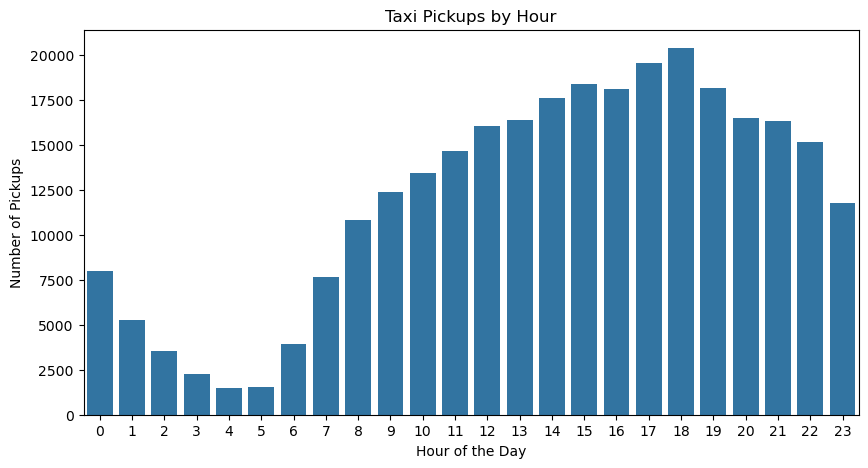

In [109]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 5))
sns.countplot(x=df['hour'])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Hour")
plt.show()


In [111]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek
df['pickup_day']


2356316    3
815653     3
439987     4
2950865    1
827572     3
          ..
1855549    0
2095468    0
735970     2
60229      5
2271494    1
Name: pickup_day, Length: 289784, dtype: int32

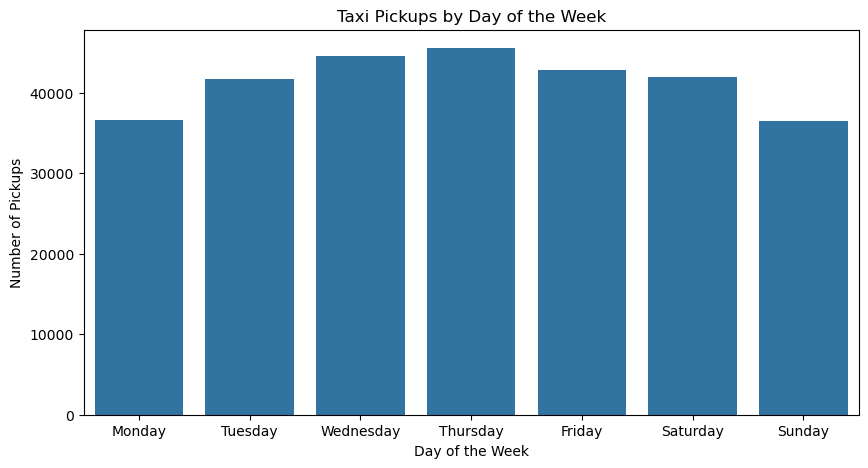

In [113]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pickup_day'])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [202]:
# Show the monthly trends in pickups
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x=df['pickup_month'])
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'Jully', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=90)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [115]:
# Analyse the above parameters
print('fare_amount:', (df['fare_amount']<=0).sum())
print('total_amount:', (df['total_amount']<=0).sum())
print('trip_distance:', (df['trip_distance']<=0).sum())
print('tip_amount:', (df['tip_amount']<=0).sum())

fare_amount: 92
total_amount: 48
trip_distance: 3650
tip_amount: 65132


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [117]:
# Create a df with non zero entries for the selected parameters.
df_cleaned = df[(df['fare_amount'] > 0) &  (df['total_amount'] > 0) & (df['trip_distance'] > 0) & (df['tip_amount'] >= 0)].copy()

In [119]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286084 entries, 2356316 to 2271494
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               286084 non-null  int64         
 1   tpep_pickup_datetime   286084 non-null  datetime64[us]
 2   tpep_dropoff_datetime  286084 non-null  datetime64[us]
 3   passenger_count        286084 non-null  float64       
 4   trip_distance          286084 non-null  float64       
 5   RatecodeID             286084 non-null  float64       
 6   store_and_fwd_flag     286084 non-null  object        
 7   PULocationID           286084 non-null  int64         
 8   DOLocationID           286084 non-null  int64         
 9   payment_type           286084 non-null  int64         
 10  fare_amount            286084 non-null  float64       
 11  extra                  286084 non-null  float64       
 12  mta_tax                286084 non-null  fl

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [125]:
# Group data by month and analyse monthly revenue
df['month'] = df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby('month')['total_amount'].sum()
print(monthly_revenue)

month
1     645881.37
2     618430.32
3     731174.22
4     710143.79
5     792796.16
6     733502.42
7     648803.75
8     625973.88
9     638646.78
10    788613.06
11    722077.57
12    722848.69
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [133]:
# Calculate proportion of each quarter
df['quarter'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.to_period('Q')
quarter_revenue = df.groupby(df['quarter'])['total_amount'].sum()
quarter_revenue_proportion = quarter_revenue / quarter_revenue.sum()
print(quarter_revenue_proportion)

quarter
2023Q1    0.238156
2023Q2    0.266914
2023Q3    0.228362
2023Q4    0.266567
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

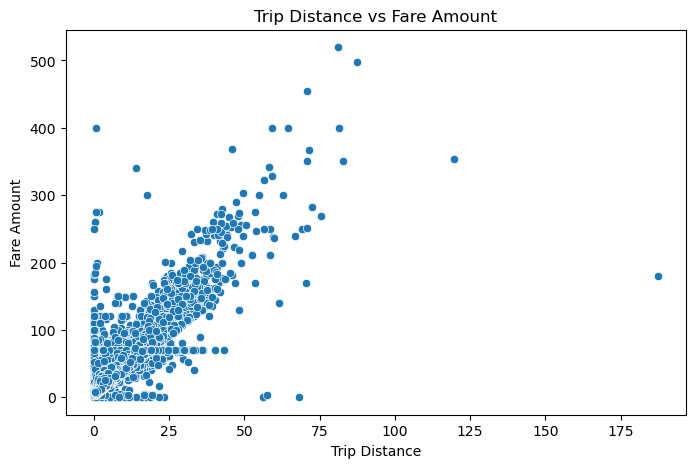

In [137]:
# Show how trip fare is affected by distance
filtered_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [174]:
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds()

/var/folders/p8/_z8jqxzs1_z289s8hy6jtdjm0000gn/T/ipykernel_44961/4060368595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds()


In [176]:
filtered_df['trip_duration']

2356316     972.0
815653     1371.0
439987      734.0
2950865     504.0
827572      811.0
            ...  
1855549     469.0
2095468    1589.0
735970      425.0
60229       311.0
2271494    1413.0
Name: trip_duration, Length: 286134, dtype: float64

In [180]:
# Show relationship between fare and trip duration
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='trip_duration', y='fare_amount')
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount")
plt.title(f"Fare Amount vs Trip Duration)")
plt.show()

In [184]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  289784.000000                      289784                      289784   
mean        1.736711  2023-07-01 17:41:30.901358  2023-07-01 17:58:57.275970   
min         1.000000         2023-01-01 00:04:55         2023-01-01 00:10:20   
25%         1.000000  2023-04-01 18:32:24.500000  2023-04-01 18:44:53.750000   
50%         2.000000  2023-06-25 21:35:06.500000         2023-06-25 21:53:33   
75%         2.000000  2023-10-05 16:23:18.500000  2023-10-05 16:43:35.500000   
max         2.000000         2023-12-31 23:57:12         2024-01-01 12:29:40   
std         0.440419                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    289784.000000  289784.000000  289784.000000  289784.000000   
mean          1.368820       3.460704       1.074783     165.403915   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.390000       1.000000     234.000000   
max           6.000000     187.350000       6.000000     265.000000   
std           0.889523       4.568640       0.393516      63.691669   

        DOLocationID   payment_type    fare_amount  ...     tip_amount  \
count  289784.000000  289784.000000  289784.000000  ...  289784.000000   
mean      164.573717       1.206219      19.781900  ...       3.571594   
min         1.000000       1.000000       0.000000  ...       0.000000   
25%       114.000000       1.000000       9.300000  ...       1.000000   
50%       162.000000       1.000000      13.500000  ...       2.860000   
75%       234.000000       1.000000      21.900000  ...       4.450000   
max       265.000000       4.000000     519.600000  ...     150.000000   
std        69.691633       0.469032      18.260706  ...       4.050668   

        tolls_amount  improvement_surcharge   total_amount  \
count  289784.000000          289784.000000  289784.000000   
mean        0.603413               0.999298      28.914267   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.720000   
max        87.500000               1.000000     530.060000   
std         2.192185               0.024649      22.888082   

       congestion_surcharge           hour  Combined_airport_fee  \
count         289784.000000  289784.000000         289784.000000   
mean               2.306123      14.315328              0.144282   
min                0.000000       0.000000              0.000000   
25%                2.500000      11.000000              0.000000   
50%                2.500000      15.000000              0.000000   
75%                2.500000      19.000000              0.000000   
max                2.500000      23.000000              1.750000   
std                0.668660       5.762130              0.466604   

          pickup_day          month  trip_duration  
count  289784.000000  289784.000000  289784.000000  
mean        2.995069       6.504797    1046.374614  
min         0.000000       1.000000   -3258.000000  
25%         1.000000       4.000000     455.000000  
50%         3.000000       6.000000     753.000000  
75%         5.000000      10.000000    1233.000000  
max         6.000000      12.000000  324660.000000  
std         1.930566       3.460832    2547.537836  

[8 rows x 22 columns]

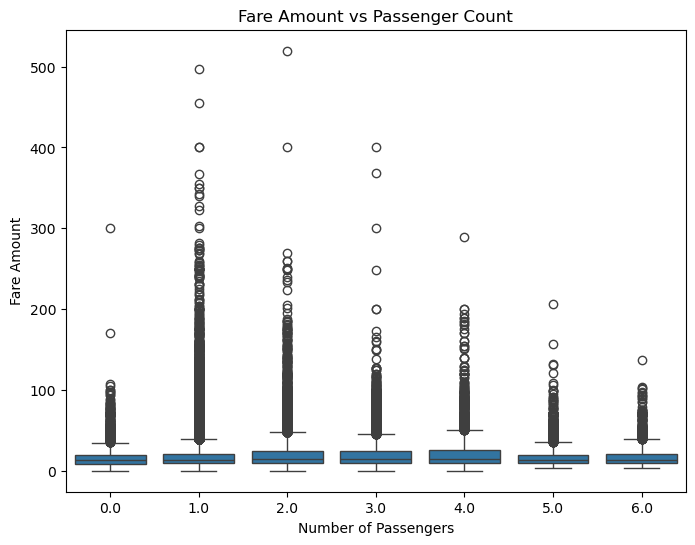

In [186]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,6))
sns.boxplot(data=filtered_df, x='passenger_count', y='fare_amount')
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs Passenger Count")
plt.show()

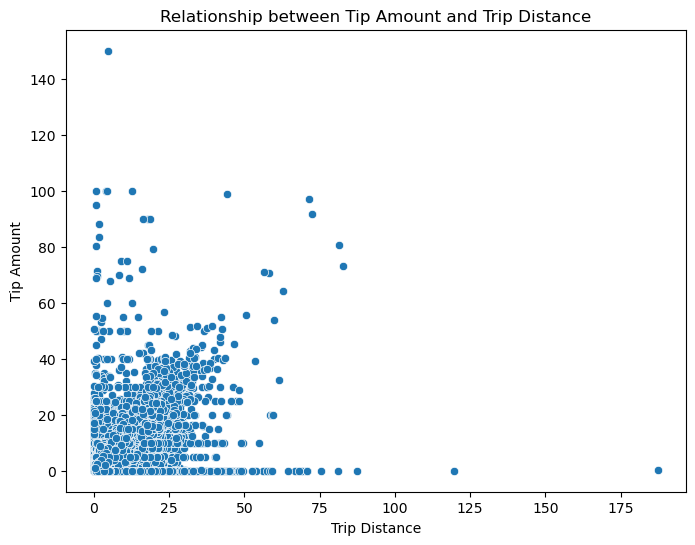

In [190]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='tip_amount')
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.title("Relationship between Tip Amount and Trip Distance")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

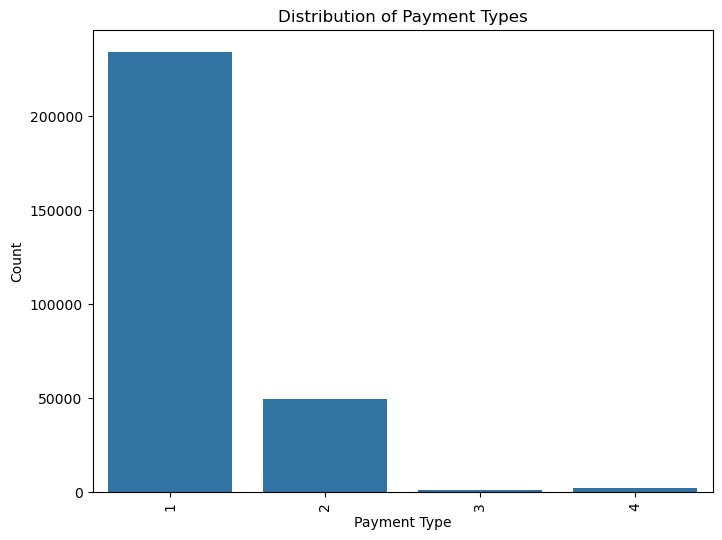

In [198]:
# Analyse the distribution of different payment types (payment_type).
payment_counts=filtered_df['payment_type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=90)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [202]:
!pip install geopandas
import geopandas as gpg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 1.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.0 MB/s eta 0:00:00a 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [212]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpg.read_file('/Users/abhijitkotibhaskar/Downloads/Datasets_and_Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

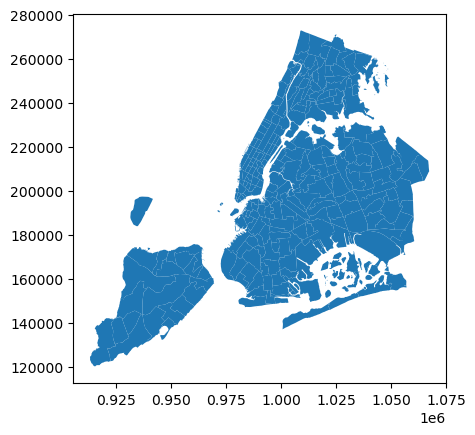

In [206]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [218]:
# Merge zones and trip records using locationID and PULocationID
merged_df = filtered_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged dataset
merged_df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           0.95         1.0                  N           246           186   
4           2.80         1.0                  N            65            13   

   payment_type  ...  month  quarter  trip_duration  OBJECTID  Shape_Leng  \
0             2  ...      7   2023Q3          972.0     263.0    0.037017   
1             1  ...     12   2023Q4         1371.0     231.0    0.063420   
2             2  ...      1   2023Q1          734.0     236.0    0.044252   
3             1  ...     11   2023Q4          504.0     246.0    0.069467   
4             2  ...      6   2023Q2          811.0      65.0    0.044607   

   Shape_Area                         zone  LocationID    borough  \
0    0.000066               Yorkville West       263.0  Manhattan   
1    0.000167         TriBeCa/Civic Center       231.0  Manhattan   
2    0.000103        Upper East Side North       236.0  Manhattan   
3    0.000281    West Chelsea/Hudson Yards       246.0  Manhattan   
4    0.000082  Downtown Brooklyn/MetroTech        65.0   Brooklyn   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((981667.364 203305, 981854.109 203130...  
2  POLYGON ((995940.048 221122.92, 995812.322 220...  
3  POLYGON ((983031.177 217138.506, 983640.32 216...  
4  POLYGON ((987819.98 194536.761, 987838.631 194...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [230]:
# Group data by location and calculate the number of trips
trip_counts = filtered_df.groupby('PULocationID').size().reset_index(name='trip_count')
print(trip_counts)
trip_counts.sort_values(by='trip_count', ascending=False)

     PULocationID  trip_count
0               1           8
1               2           1
2               3           5
3               4         257
4               5           1
..            ...         ...
233           261        1472
234           262        3766
235           263        5620
236           264        2513
237           265          62

[238 rows x 2 columns]


PULocationID  trip_count
115           132       15221
212           237       13649
143           161       13538
211           236       12233
144           162       10266
..            ...         ...
158           178           1
138           156           1
4               5           1
53             59           1
190           214           1

[238 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [248]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)

In [250]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  trip_count_x  PULocationID_y  trip_count_y  PULocationID  \
0             1.0           8.0             1.0           8.0           1.0   
1             2.0           1.0             2.0           1.0           2.0   
2             3.0           5.0             3.0           5.0           3.0   
3             4.0         257.0             4.0         257.0           4.0   
4             5.0           1.0             5.0           1.0           5.0   

   trip_count  
0         8.0  
1         1.0  
2         5.0  
3       257.0  
4         1.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

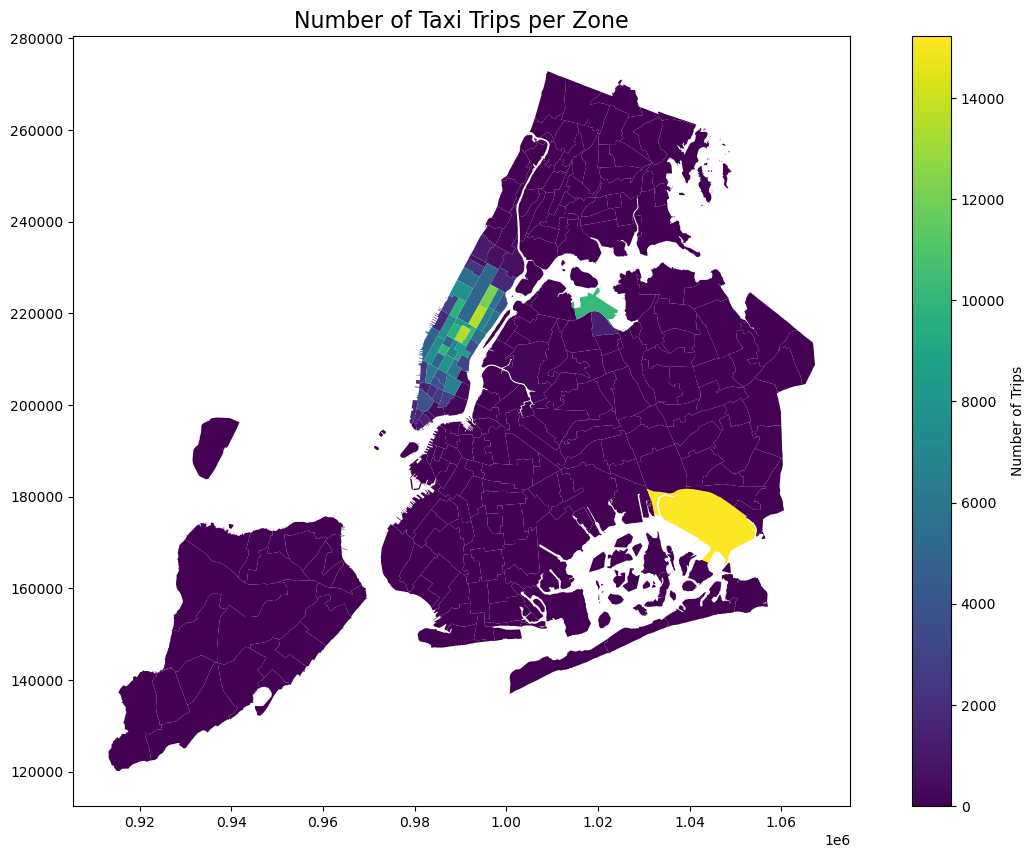

In [262]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10))



# Plot the map and display it
zones.plot(
    column='trip_count',
    ax=ax, 
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
plt.title("Number of Taxi Trips per Zone", fontsize=16)
plt.show()

In [270]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by = 'trip_count')
print(sorted_zones.head(10))

     OBJECTID  Shape_Leng  Shape_Area                    zone  LocationID  \
171       172    0.118476    0.000658  New Dorp/Midland Beach         172   
198       199    0.077809    0.000289           Rikers Island         199   
186       187    0.126868    0.000421           Port Richmond         187   
183       184    0.260816    0.001989         Pelham Bay Park         184   
182       183    0.039826    0.000095              Pelham Bay         183   
175       176    0.151995    0.000658                 Oakwood         176   
250       251    0.137711    0.000626             Westerleigh         251   
57         58    0.059855    0.000205            Country Club          58   
152       153    0.024737    0.000032             Marble Hill         153   
127       128    0.070209    0.000207        Inwood Hill Park         128   

           borough                                           geometry  \
171  Staten Island  POLYGON ((960204.812 146820.751, 960103.437 14...   
198   

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [522]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = filtered_df.groupby('hour').size()
max_trips = trips_per_hour.max()
df_2 = {}
for hour in range(24):
    df_2[hour] = filtered_df[filtered_df['hour'] == hour].shape[0]

print(df_2)

{0: 7918, 1: 5166, 2: 3494, 3: 2227, 4: 1431, 5: 1497, 6: 3850, 7: 7550, 8: 10710, 9: 12243, 10: 13263, 11: 14488, 12: 15814, 13: 16166, 14: 17413, 15: 18163, 16: 17911, 17: 19361, 18: 20198, 19: 18037, 20: 16366, 21: 16174, 22: 15055, 23: 11639}


In [536]:
hours = list(df_2.keys())
trip_counts = list(df_2.values())

plt.figure(figsize=(10, 5))
plt.plot(hours, trip_counts, linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Taxi Trip Count by Hour of the Day')
plt.xticks(hours)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [288]:
# Scale up the number of trips
top_5_hours = sorted(df_2.items(), key=lambda x: x[1], reverse=True)[:5]
# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =
print(top_5_hours)


[(18, 20198), (17, 19361), (15, 18163), (19, 18037), (16, 17911)]


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [290]:
# Find top 10 pickup and dropoff zones
top_pickups = filtered_df['PULocationID'].value_counts().nlargest(10)
top_dropoffs = filtered_df['DOLocationID'].value_counts().nlargest(10)
print(top_pickups)
print(top_dropoffs)

PULocationID
132    15221
237    13649
161    13538
236    12233
162    10266
138    10176
186     9939
142     9727
230     9639
170     8451
Name: count, dtype: int64
DOLocationID
236    12980
237    12308
161    11326
230     8889
170     8497
162     8186
239     8012
142     7995
141     7753
68      7312
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [292]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
low_pickups = filtered_df['PULocationID'].value_counts().nsmallest(10)
low_dropoffs = filtered_df['DOLocationID'].value_counts().nsmallest(10)
print(low_pickups)
print(low_dropoffs)

PULocationID
96     1
204    1
206    1
108    1
214    1
253    1
156    1
178    1
31     1
2      1
Name: count, dtype: int64
DOLocationID
176    1
99     1
156    2
206    2
115    2
204    2
221    2
57     2
251    3
30     3
Name: count, dtype: int64


In [538]:
pickup_counts = filtered_df['PULocationID'].value_counts()
dropoff_counts = filtered_df['DOLocationID'].value_counts()

In [544]:
pickup_counts = filtered_df['PULocationID'].value_counts()
dropoff_counts = filtered_df['DOLocationID'].value_counts()

ratio = (pickup_counts / dropoff_counts).dropna()

# Highest pickup/drop-off ratio
top_10_ratios = ratio.nlargest(10)
# Lowest pickup/drop-off ratio
bottom_10_ratios = ratio.nsmallest(10)  

print("Top 10 Pickup/Drop-off Ratios:\n", top_10_ratios)
print("Bottom 10 Pickup/Drop-off Ratios:\n", bottom_10_ratios)

Top 10 Pickup/Drop-off Ratios:
 70     9.243056
132    4.949919
138    2.868903
186    1.575868
43     1.430101
114    1.383461
249    1.292633
162    1.254092
142    1.216635
161    1.195303
Name: count, dtype: float64
Bottom 10 Pickup/Drop-off Ratios:
 1      0.009604
198    0.013158
257    0.017699
108    0.032258
178    0.033333
112    0.035115
202    0.040000
227    0.046512
37     0.049057
106    0.052083
Name: count, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [304]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
#filtered_df['hour'].unique()
night_trips = filtered_df[(filtered_df['hour'] >= 23) | (filtered_df['hour'] <= 5)]
#print(night_trips['hour'].unique())
top_night_pickups = night_trips.groupby('PULocationID').size().nlargest(10)
top_night_dropoffs = night_trips.groupby('DOLocationID').size().nlargest(10)
print(top_night_pickups, top_night_dropoffs)

PULocationID
79     2448
132    2254
249    1887
48     1606
148    1493
114    1406
230    1266
186    1052
138     957
164     936
dtype: int64 DOLocationID
79     1256
48     1099
170     949
68      940
107     927
141     811
249     810
263     736
230     726
236     721
dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [324]:
# Filter for night hours (11 PM to 5 AM)
#night_trips['total_amount']
day_trips = filtered_df[(filtered_df['hour'] >= 6) & (filtered_df['hour'] <= 22)]
amount_night = night_trips['total_amount'].sum()
amount_day = day_trips['total_amount'].sum()
#print(amount_night)
#print(amount_day)
total_amount_sum = filtered_df['total_amount'].sum()
#print(total_amount_sum)
percentage_night = amount_night/total_amount_sum*100
percentage_day = amount_day/total_amount_sum*100
print(percentage_night,percentage_day)

11.783587318874835 88.21641268112515


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [362]:
# Analyse the fare per mile per passenger for different passenger counts
(filtered_df['trip_distance'] < 0).sum()
(filtered_df['passenger_count'] <= 0).sum()
valid_trips = filtered_df[(filtered_df['trip_distance'] > 0) & (filtered_df['passenger_count'] > 0)].copy()
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=valid_trips, x='passenger_count', y='fare_per_mile_per_passenger')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Fare Per Mile Per Passenger')
plt.title('Fare Per Mile Per Passenger')
plt.xticks(valid_trips['passenger_count'])
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [378]:
# Compare the average fare per mile for different days and for different times of the day
day_wise_avg_fare = valid_trips.groupby('pickup_day')['fare_per_mile_per_passenger'].mean().reset_index()

In [382]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=day_wise_avg_fare, x='pickup_day', y='fare_per_mile_per_passenger')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Per Mile')
plt.title('Average Fare Per Mile Across Days of the Week')
plt.xticks(range(1, 8))
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [392]:
# Compare fare per mile for different vendors
vendor_fare = valid_trips.groupby('VendorID')['fare_per_mile_per_passenger'].mean().reset_index()
vendor_fare['VendorID'].unique()
filtered_df['VendorID'].unique()

array([2, 1])

In [388]:
plt.figure(figsize=(8, 5))
sns.barplot(data=vendor_fare, x='VendorID', y='fare_per_mile_per_passenger')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare Per Mile')
plt.title('Comparison of Fare Per Mile by Vendor')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [394]:
# Defining distance tiers
bins = [0, 2, 5, float('inf')]
labels = ['Short', 'Medium', 'Long']
valid_trips['distance_tier'] = pd.cut(valid_trips['trip_distance'], bins=bins, labels=labels)

In [396]:
# Group by Vendor and Distance Tier
vendor_fare_tiered = valid_trips.groupby(['VendorID', 'distance_tier'])['fare_per_mile_per_passenger'].mean().reset_index()

/var/folders/p8/_z8jqxzs1_z289s8hy6jtdjm0000gn/T/ipykernel_44961/1893660070.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_fare_tiered = valid_trips.groupby(['VendorID', 'distance_tier'])['fare_per_mile_per_passenger'].mean().reset_index()


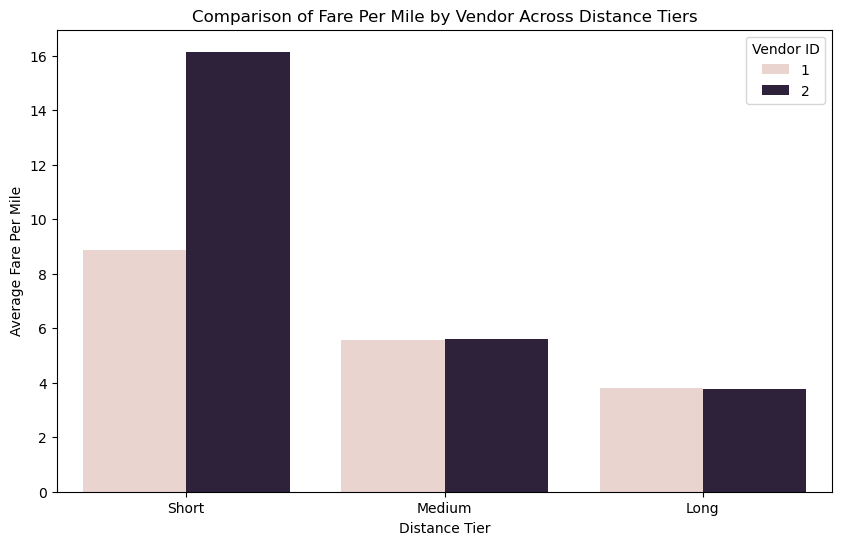

In [406]:
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_fare_tiered, x='distance_tier', y='fare_per_mile_per_passenger', hue='VendorID')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare Per Mile')
plt.title('Comparison of Fare Per Mile by Vendor Across Distance Tiers')
plt.legend(title='Vendor ID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [408]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_trips['tip_percentage'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

In [410]:
distance_tip = valid_trips.groupby('distance_tier')['tip_percentage'].mean().reset_index()

/var/folders/p8/_z8jqxzs1_z289s8hy6jtdjm0000gn/T/ipykernel_44961/2428987043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_tip = valid_trips.groupby('distance_tier')['tip_percentage'].mean().reset_index()


In [412]:
plt.figure(figsize=(8, 5))
sns.barplot(data=distance_tip, x='distance_tier', y='tip_percentage')
plt.xlabel('Trip Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage Based on Trip Distance')
plt.show()

In [414]:
passenger_tip = valid_trips.groupby('passenger_count')['tip_percentage'].mean().reset_index()

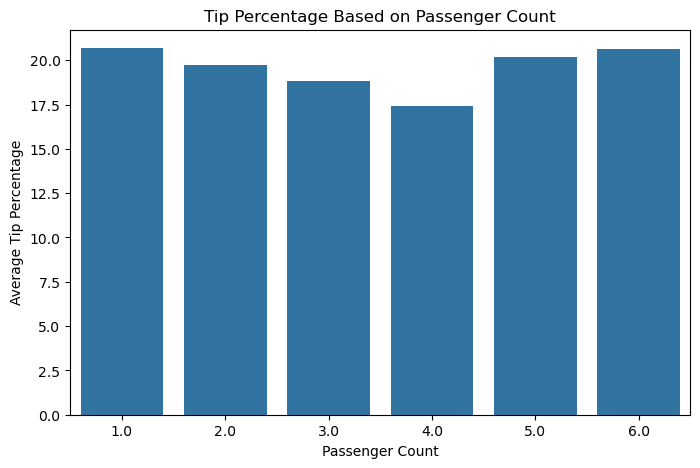

In [416]:
plt.figure(figsize=(8, 5))
sns.barplot(data=passenger_tip, x='passenger_count', y='tip_percentage')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage Based on Passenger Count')
plt.show()

In [420]:
hourly_tip = valid_trips.groupby('hour')['tip_percentage'].mean().reset_index()

In [422]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_tip, x='hour', y='tip_percentage')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [548]:
# See how passenger count varies across hours and days
valid_trips.info()
passenger_t = valid_trips.groupby(['hour', 'pickup_day'])['passenger_count'].mean().reset_index()
print(passenger_t)

<class 'pandas.core.frame.DataFrame'>
Index: 281698 entries, 2356316 to 2271494
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   VendorID                     281698 non-null  int64         
 1   tpep_pickup_datetime         281698 non-null  datetime64[us]
 2   tpep_dropoff_datetime        281698 non-null  datetime64[us]
 3   passenger_count              281698 non-null  float64       
 4   trip_distance                281698 non-null  float64       
 5   RatecodeID                   281698 non-null  float64       
 6   store_and_fwd_flag           281698 non-null  object        
 7   PULocationID                 281698 non-null  int64         
 8   DOLocationID                 281698 non-null  int64         
 9   payment_type                 281698 non-null  int64         
 10  fare_amount                  281698 non-null  float64       
 11  extra                   

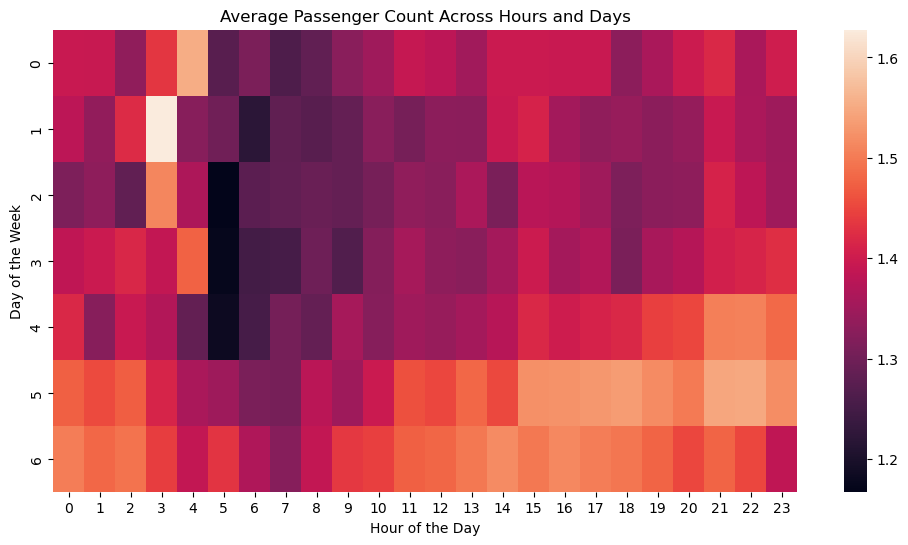

In [438]:
pivot_table = passenger_trends.pivot(index='pickup_day', columns='hour', values='passenger_count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table)
plt.title("Average Passenger Count Across Hours and Days")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [440]:
# How does passenger count vary across zones
passenger_by_zone = df.groupby('PULocationID')['passenger_count'].sum().reset_index()
print(passenger_by_zone.sort_values(by='passenger_count', ascending=False))

     PULocationID  passenger_count
115           132          23015.0
144           161          18662.0
213           237          18088.0
212           236          16261.0
206           230          14328.0
..            ...              ...
139           156              1.0
227           253              1.0
136           153              1.0
89             96              1.0
225           251              1.0

[240 rows x 2 columns]


In [444]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_by_zone)
plt.xlabel("Pickup Location ID")
plt.ylabel("Total Passenger Count")
plt.title("Top 10 Pickup Zones by Total Passengers")
plt.show()

In [502]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
trip_counts = filtered_df.groupby('PULocationID').size().reset_index(name='trip_counts')
# Create a new column for the average passenger count in each zone.
passenger_by_zone = passenger_by_zone.merge(trip_counts, left_on='PULocationID', right_on='PULocationID', how='left')
passenger_by_zone['avg_passenger_count'] = passenger_by_zone['passenger_count'] / passenger_by_zone['trip_counts']
print(passenger_by_zone[['PULocationID', 'avg_passenger_count']])

     PULocationID  avg_passenger_count
0               1             5.500000
1               2             1.000000
2               3             1.000000
3               4             1.521401
4               5             3.000000
..            ...                  ...
235           261             1.525136
236           262             1.310674
237           263             1.316726
238           264             1.455631
239           265             3.919355

[240 rows x 2 columns]


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [508]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']
surcharge_counts = filtered_df[surcharge_columns].sum()
total_trips = len(filtered_df)
surcharge_percentages = (surcharge_counts / total_trips) * 100
surcharge_summary = pd.DataFrame({'Count': surcharge_counts, 'Percentage (%)': surcharge_percentages})
print(surcharge_summary)

                           Count  Percentage (%)
extra                  472374.14      165.088434
mta_tax                142143.40       49.677214
improvement_surcharge  286026.50       99.962430
congestion_surcharge   664210.00      232.132497


In [510]:
filtered_df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2356316         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
815653          2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
439987          2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
2950865         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
827572          1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   
1457720         2  2023-05-13 20:30:55   2023-05-13 20:41:43              1.0   
2445874         2  2023-12-22 00:34:11   2023-12-22 00:48:28              1.0   
355613          2  2023-10-04 15:14:09   2023-10-04 15:29:01              1.0   
1197123         2  2023-02-12 17:48:31   2023-02-12 18:04:32              2.0   
1627147         2  2023-07-19 16:54:27   2023-07-19 17:18:26              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2356316           6.43         1.0                  N           263   
815653            3.39         1.0                  N           231   
439987            1.65         1.0                  N           236   
2950865           0.95         1.0                  N           246   
827572            2.80         1.0                  N            65   
1457720           1.48         1.0                  N           249   
2445874           2.53         1.0                  N           140   
355613            2.92         1.0                  N           234   
1197123           3.37         1.0                  N           249   
1627147           3.04         1.0                  N           162   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
2356316           243             2  ...                    1.0         33.20   
815653            230             1  ...                    1.0         32.28   
439987            141             2  ...                    1.0         16.80   
2950865           186             1  ...                    1.0         20.54   
827572             13             2  ...                    1.0         20.30   
1457720           231             1  ...                    1.0         18.04   
2445874           143             1  ...                    1.0         24.72   
355613            232             2  ...                    1.0         20.30   
1197123            48             1  ...                    1.0         25.10   
1627147           238             1  ...                    1.0         32.80   

         congestion_surcharge  hour        date  Combined_airport_fee  \
2356316                   2.5     1  2023-07-27                   0.0   
815653                    2.5    23  2023-12-07                   0.0   
439987                    2.5    11  2023-01-06                   0.0   
2950865                   2.5    19  2023-11-28                   0.0   
827572                    2.5    13  2023-06-08                   0.0   
1457720                   2.5    20  2023-05-13                   0.0   
2445874                   2.5     0  2023-12-22                   0.0   
355613                    2.5    15  2023-10-04                   0.0   
1197123                   2.5    17  2023-02-12                   0.0   
1627147                   2.5    16  2023-07-19                   0.0   

         pickup_day  month  quarter trip_duration  
2356316           3      7   2023Q3         972.0  
815653            3     12   2023Q4        1371.0  
439987            4      1   2023Q1         734.0  
2950865           1     11   2023Q4         504.0  
827572            3      6   2023Q2         811.0  
1457720           5      5   2023Q2         648.0  
2445874           4     12   2023Q4         857.0  
355613            2     10   2023Q4         892.0  
1197123           6      2   2023Q1         961.0  
1627147           2      7   2023Q3        1439.0  

[10 rows x 25 columns]

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.